In [43]:
import torch

from models import DDDMInput

from models import style_encoder_from_config
from config import load_hydra_config


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cfg = load_hydra_config("dddm_vc_xlsr")

style_encoder = style_encoder_from_config(cfg, device)

def plot_mel(mel: torch.Tensor):
    fig, ax = plt.subplots(1)
    mel = mel.cpu().numpy()
    im = ax.imshow(mel, aspect='auto', origin='lower', interpolation='none')
    fig.colorbar(im, ax=ax)
    plt.xlabel('Time')
    plt.ylabel('Mel Frequency')
    plt.title('Mel Spectrogram')
    plt.show()

def plot_waveform(waveform: torch.Tensor, sample_rate: int):
    waveform = waveform.cpu().numpy()
    time_axis = torch.arange(0, waveform.size) / sample_rate

    plt.figure(figsize=(10, 4))
    plt.plot(time_axis, waveform, linewidth=1)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Waveform')
    plt.grid(True)
    plt.show()



In [44]:
from pathlib import Path

path = Path("src/extracted")
filenames = [p.name for p in path.glob("*.pt")]
x = DDDMInput.load(path, filenames)
x

DDDMInput(audio=torch.Size([352, 38000]), mel=torch.Size([352, 80, 118]), mask=torch.Size([352, 1, 118]), emb_pitch=torch.Size([352, 29]), emb_content=torch.Size([352, 1024, 118]))

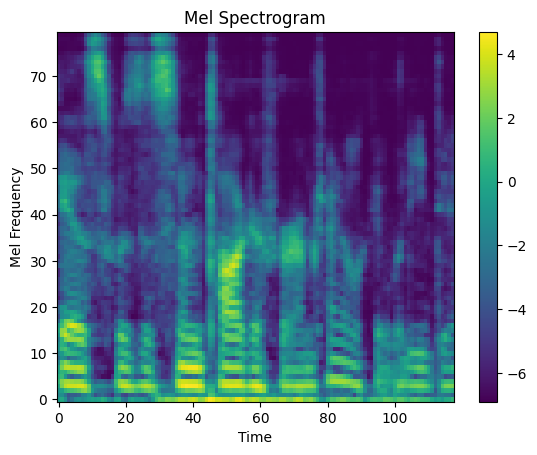

In [45]:
plot_mel(x.mel[20])

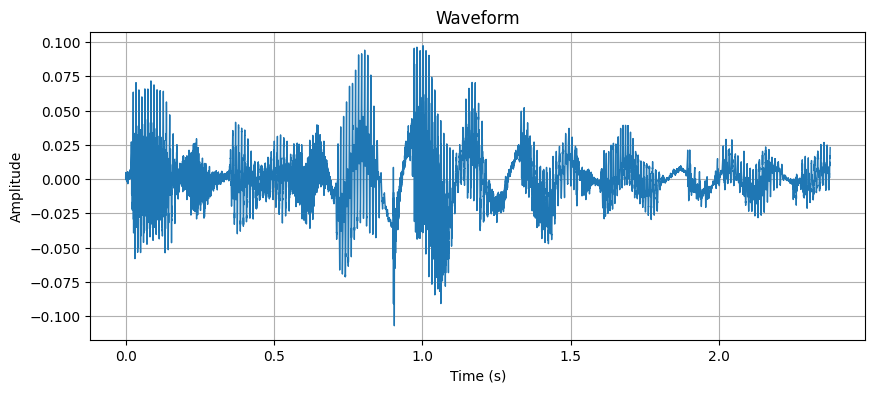

In [46]:
plot_waveform(x.audio[20], sample_rate=16000)

D:\DDDM-EVC\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\alex_\AppData\Local\Temp\ipykernel_33188\1200628964.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=5, cmap='viridis')


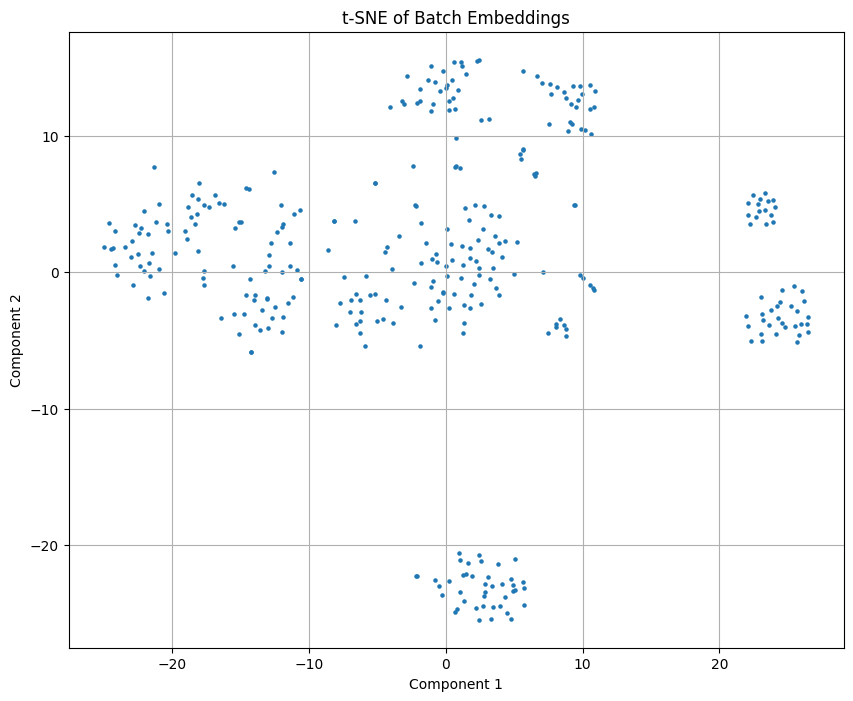

In [47]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_batch_embeddings(embeddings: torch.Tensor, perplexity: int = 30, n_iter: int = 1000):
    """
    Plot a batch of embeddings using t-SNE.

    :param embeddings: Batch of embeddings tensor (batch_size, embedding_dim)
    :param perplexity: Perplexity parameter for t-SNE
    :param n_iter: Number of iterations for t-SNE
    """
    embeddings = embeddings.view(embeddings.size(0), -1).cpu().numpy()
    tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=n_iter, random_state=42)
    embeddings_2d = tsne.fit_transform(embeddings)

    plt.figure(figsize=(10, 8))
    plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=5, cmap='viridis')
    plt.title('t-SNE of Batch Embeddings')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()

# Example usage
emb_style = style_encoder(x)
plot_batch_embeddings(emb_style)